# Probability and Statistics Assignment


## mean, median, and standard deviation for all numerical features.

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
mean = iris_df.mean()
median = iris_df.median()
std_dev = iris_df.std()

# Display results
print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nStandard Deviation:\n", std_dev)

Mean:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Median:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Standard Deviation:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


## Histograms

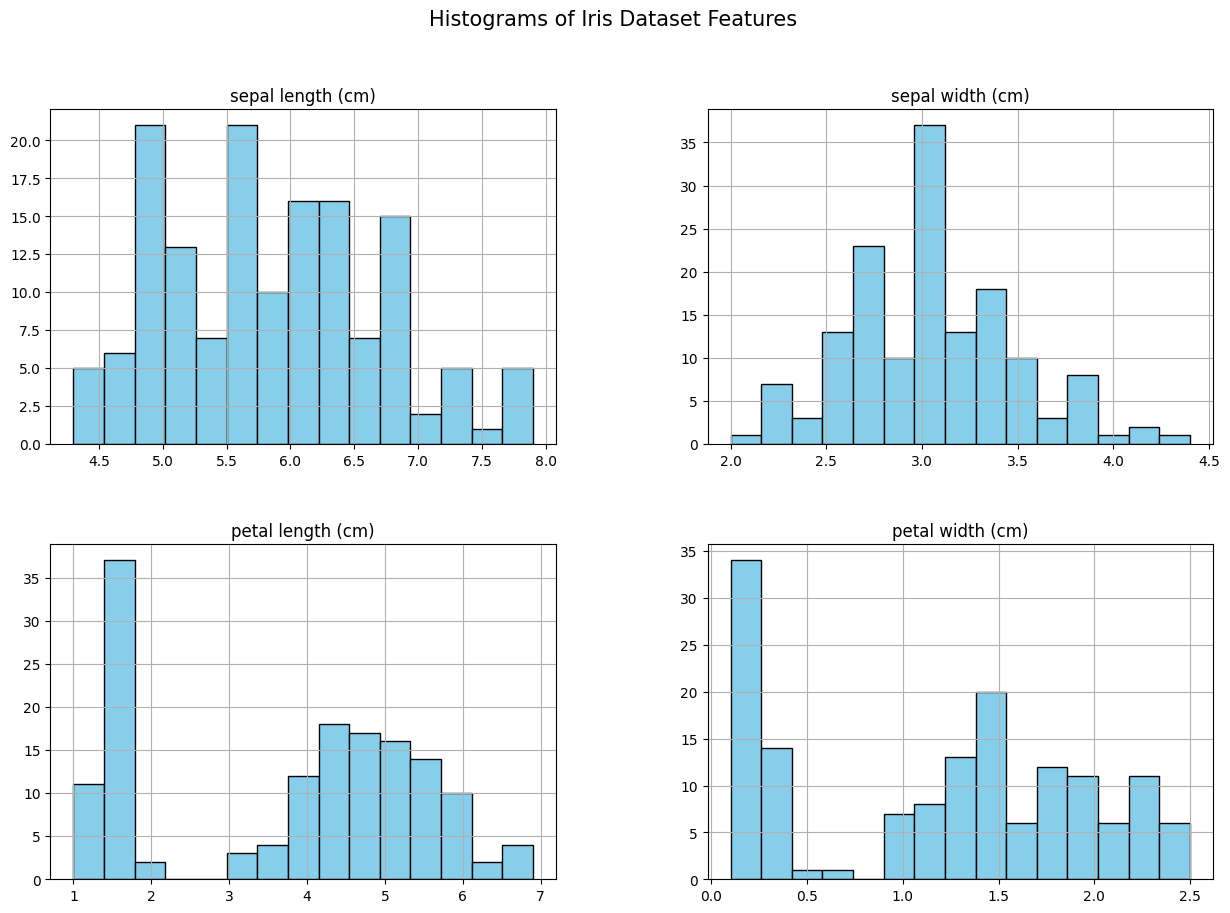

In [9]:
import matplotlib.pyplot as plt

# Create histograms
iris_df.hist(figsize=(15, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Iris Dataset Features', fontsize=15)
plt.show()

## BOXPLOTS

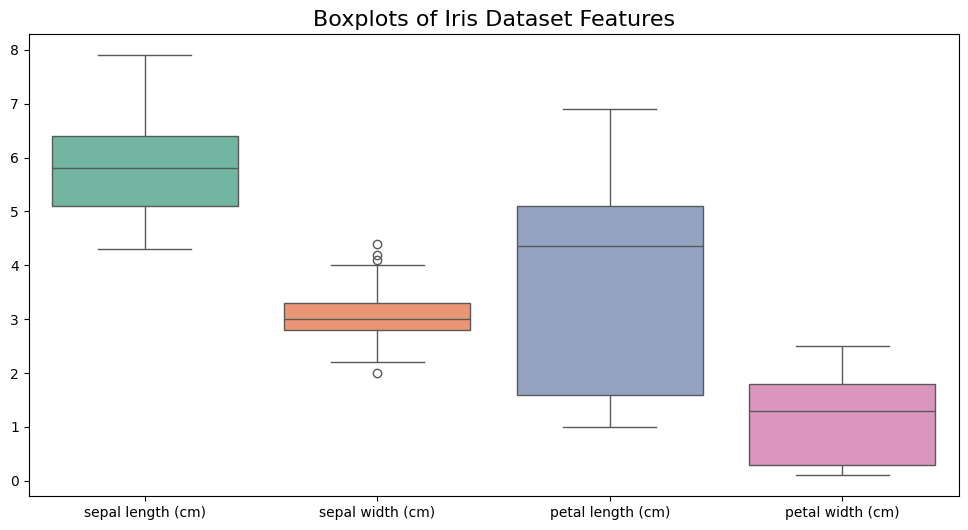

In [12]:
import seaborn as sns

# Create boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_df, palette="Set2")
plt.title('Boxplots of Iris Dataset Features', fontsize=16)
plt.xticks(ticks=range(len(iris.feature_names)), labels=iris.feature_names, rotation=0)
plt.show()

## CORRELATION MATRIX USING HEATMAP

Correlation Matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


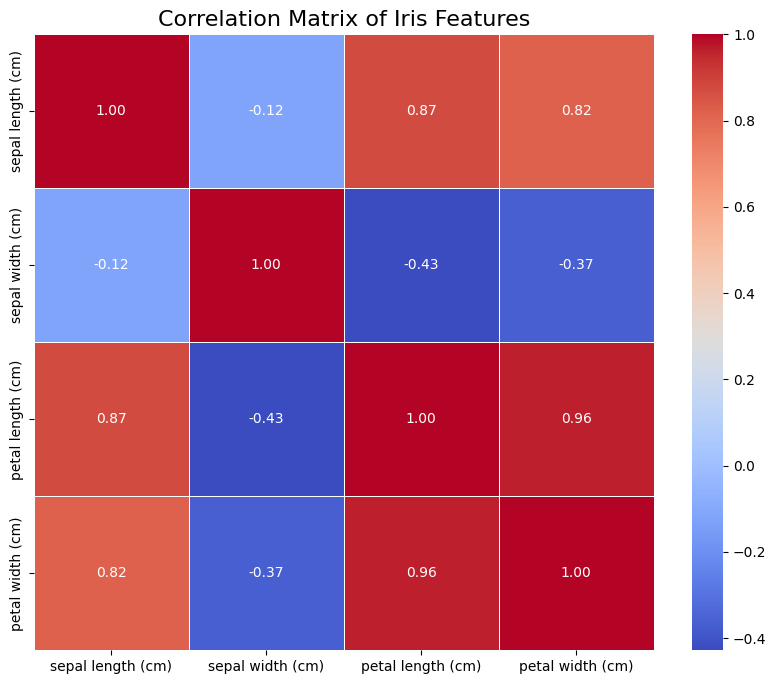

In [18]:
# Calculate the correlation matrix
correlation_matrix = iris_df.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Iris Features", fontsize=16)
plt.show()


In [20]:
import pandas as pd

# Define the event table
data = {
    "B": [30, 50],       # Counts for B and not A in column B
    "not B": [20, 100],  # Counts for not B and not A in column not B
}
events = pd.DataFrame(data, index=["A", "not A"])

# Total outcomes
total_outcomes = events.values.sum()

# Probabilities
P_B = events["B"].sum() / total_outcomes
P_A = events.loc["A"].sum() / total_outcomes
P_A_and_B = events.loc["A", "B"] / total_outcomes

# Compute conditional probabilities
P_A_given_B = P_A_and_B / P_B
P_B_given_A = P_A_and_B / P_A

# Display results
print(f"P(A|B): {P_A_given_B}")
print(f"P(B|A): {P_B_given_A}")


P(A|B): 0.37499999999999994
P(B|A): 0.6


In [22]:
# Define probabilities
P_Spam = 0.2
P_Not_Spam = 0.8
P_Keyword_given_Spam = 0.7
P_Keyword_given_Not_Spam = 0.1

# Compute P(Keyword)
P_Keyword = (P_Keyword_given_Spam * P_Spam) + (P_Keyword_given_Not_Spam * P_Not_Spam)

# Compute P(Spam | Keyword) using Bayes' Theorem
P_Spam_given_Keyword = (P_Keyword_given_Spam * P_Spam) / P_Keyword

# Display results
print(f"P(Spam | Keyword): {P_Spam_given_Keyword}")


P(Spam | Keyword): 0.6363636363636362


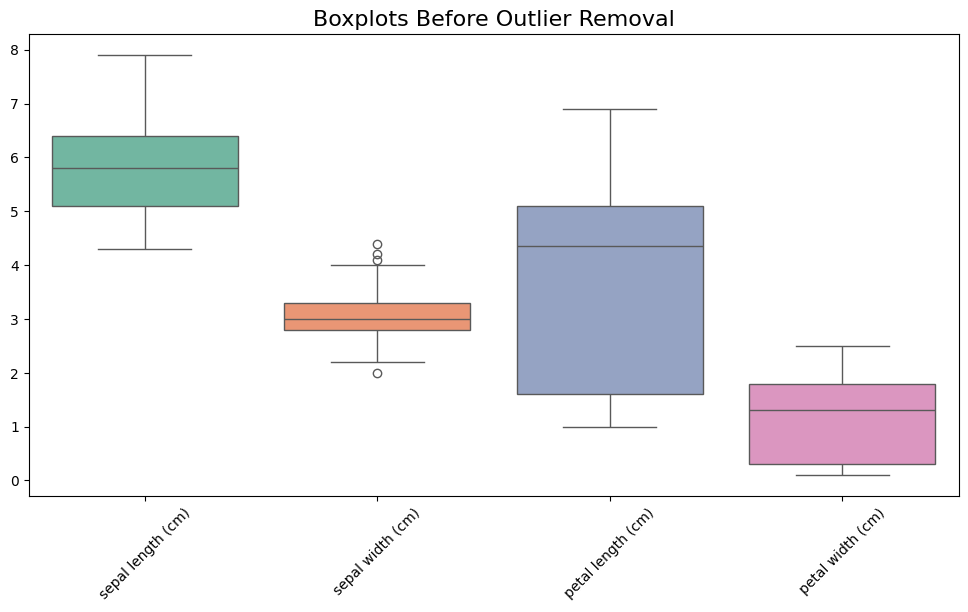

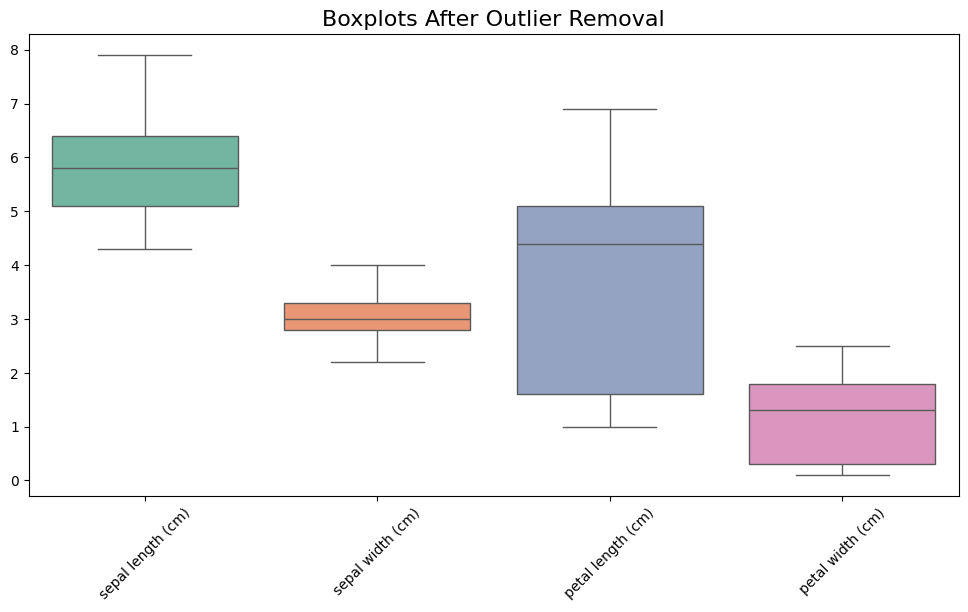

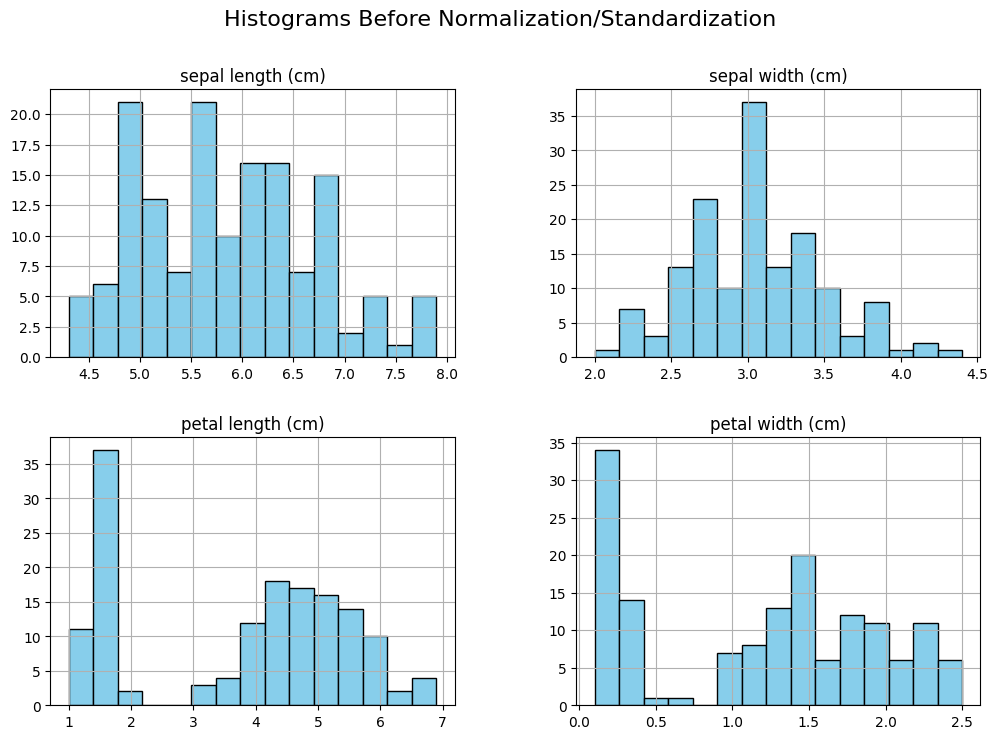

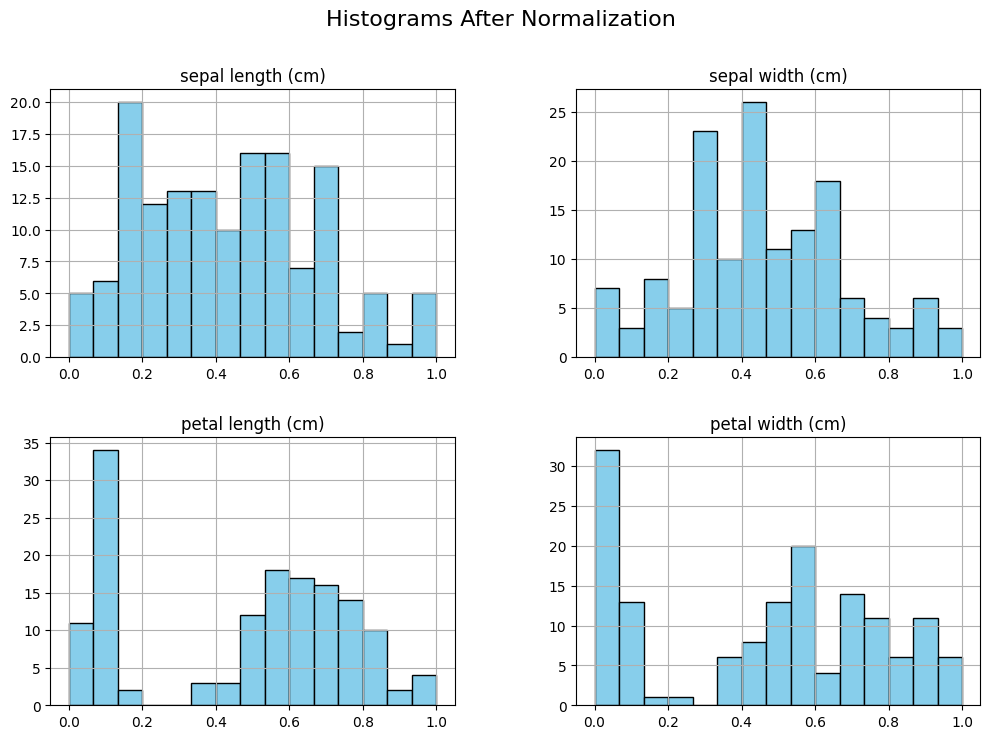

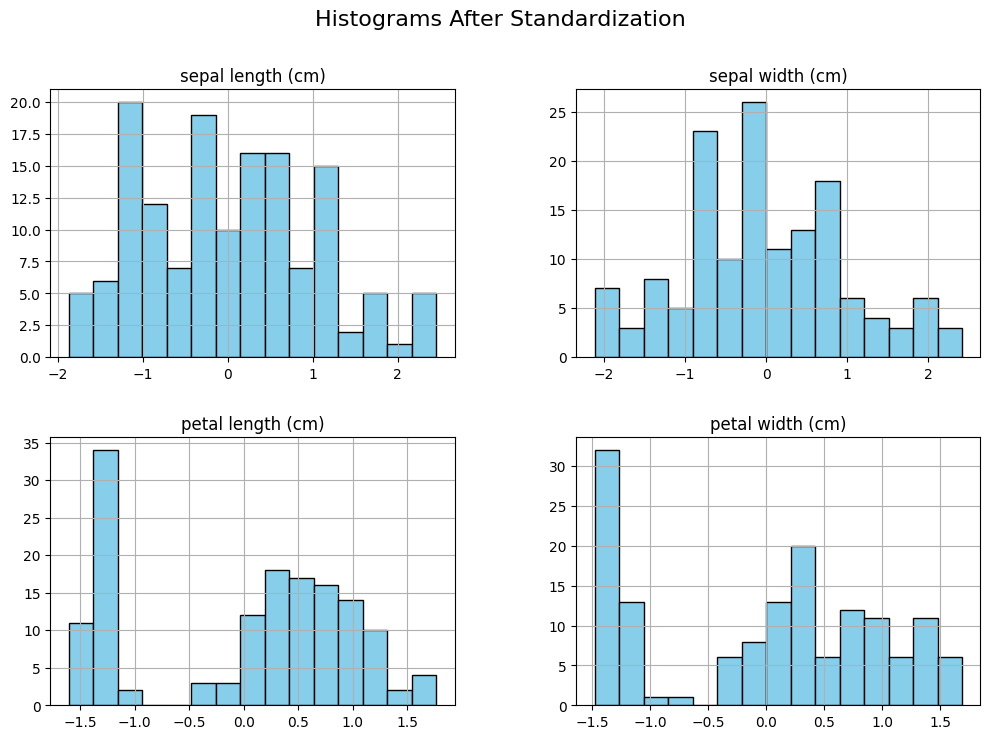

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Function to compute Q1, Q3, and IQR
def compute_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

# Detect and remove outliers
def remove_outliers(data):
    Q1, Q3, IQR = compute_iqr(data)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Plotting before and after outlier removal
def plot_boxplots(data, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, palette="Set2")
    plt.title(title, fontsize=16)
    plt.xticks(ticks=range(len(data.columns)), labels=data.columns, rotation=45)
    plt.show()

# Remove outliers for each feature
cleaned_data = iris_df.copy()
for column in cleaned_data.columns:
    cleaned_data[column] = remove_outliers(cleaned_data[column])

# Plot boxplots before and after outlier removal
plot_boxplots(iris_df, "Boxplots Before Outlier Removal")
plot_boxplots(cleaned_data.dropna(), "Boxplots After Outlier Removal")

# Plot histograms before and after normalization and standardization
def plot_histograms(data, title):
    data.hist(figsize=(12, 8), bins=15, color="skyblue", edgecolor="black")
    plt.suptitle(title, fontsize=16)
    plt.show()

# Normalization and Standardization
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

normalized_data = scaler_minmax.fit_transform(cleaned_data.dropna())
standardized_data = scaler_standard.fit_transform(cleaned_data.dropna())

# Convert normalized and standardized data back to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=iris_df.columns)
standardized_df = pd.DataFrame(standardized_data, columns=iris_df.columns)

# Plot histograms
plot_histograms(iris_df, "Histograms Before Normalization/Standardization")
plot_histograms(normalized_df, "Histograms After Normalization")
plot_histograms(standardized_df, "Histograms After Standardization")
